<a href="https://colab.research.google.com/github/AugustoGuimaraesUFRJ/Machine-Learning/blob/main/ML_regress%C3%A3o_linear_Augusto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AUGUSTO GUIMARÃES RODRIGUES DE LIMA DRE: 119025393

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
import pandas as pd


## DATASET INICIAL

           X           Y
0  95.724162  197.179636
1  35.757619   67.590670
2  28.816847   60.854133
3  99.958481  196.907397
4  66.809748  125.311129
5  58.215693  115.785785
6  53.821076  110.762773
7  81.296082  157.985286
8  80.648697  159.619414
9  78.252814  149.003866


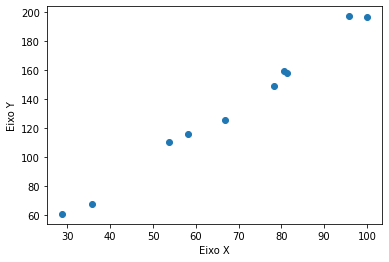

In [ ]:
data = pd.read_csv('exemplo1-regressaoLinear.csv',header=0)
print(data)

plt.scatter(data['X'], data['Y'],cmap='red')

# rótulo dos eixos e salvando o arquivo com a imagem
plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.show()

##1) Questão

Faca um programa que gere o modelo de regressao linear para os dois datasets
usados nesta aula. Os modelos devem ser gerados de duas formas:

• Usando as equacoes apresentadas no slide 15.

• Usando o modelo de regressao linear disponivel no Scikit.

In [ ]:
# Modelo equacional
# transformando X e Y para numpy array. Ele precisa ser bidimensional (-1,1)
X1 = data.iloc[:, 0].values.reshape(-1, 1) 
Y1 = data.iloc[:, 1].values.reshape(-1, 1) 

#Vamos agora calcular a reta da regressão linear usando as fórmulas apresentada

mediaX1  = np.mean(X1)
mediaX12 = np.mean(X1**2)
mediaY1  = np.mean(Y1)
mediaY12 = np.mean(Y1**2)
mediaX1Y1 = np.mean(X1*Y1)

teta0 = (mediaY1*mediaX12 - mediaX1*mediaX1Y1)/(mediaX12 - (mediaX1)**2)
teta1 =(mediaX1Y1 - mediaX1*mediaY1)/(mediaX12 - (mediaX1)**2)

print('media X:',np.mean(X1))
print('media X²:',np.mean(X1**2))
print('media Y:',np.mean(Y1))
print('media Y²:',np.mean(Y1**2))
print('media X*Y:',np.mean(X1*Y1))
print()
print('teta0:',teta0)
print('teta1:',teta1)
print()
print('Equação da Reta: Y =', teta0,' + ',teta1,'* X' )

# plotando os pontos previstos e a reta
Y1_previsto = teta0+teta1*X1

media X: 67.93012202823
media X²: 5124.991702295573
media Y: 134.1000086212
media Y²: 19994.153430738115
media X*Y: 10117.850602443814

teta0: -0.08892359520679478
teta1: 1.9753966018291795

Equação da Reta: Y = -0.08892359520679478  +  1.9753966018291795 * X


In [ ]:
# Scikit
from sklearn.linear_model import LinearRegression
regressao = LinearRegression()
regressao.fit(X1,Y1) 

LinearRegression()

In [ ]:
theta0 = regressao.intercept_
theta1 = regressao.coef_

print("Theta 0 encontrado: %f" % theta0)
print("Theta 1 encontrado: %f\n\n" % theta1)
print('Equação da Reta: Y =', theta0,' + ',theta1,'* X' )

Theta 0 encontrado: -0.088924
Theta 1 encontrado: 1.975397


Equação da Reta: Y = [-0.0889236]  +  [[1.9753966]] * X


[[189.00426154]
 [ 70.54655532]
 [ 56.83577888]
 [197.36872071]
 [131.88682619]
 [114.91015782]
 [106.22904771]
 [160.50308087]
 [159.22423852]
 [154.49141866]]


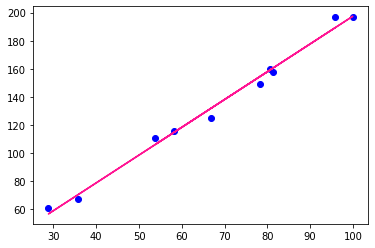

In [ ]:
# Plotando os pontos originais e a reta
Y1_previsto= teta0+teta1*X1
plt.scatter(X1, Y1,marker='o',color='blue')  #pontos originais
plt.plot(X1, Y1_previsto, color='#FF1493')
print(Y1_previsto)
plt.show()

In [ ]:
# Soma das diferenças entre o valor previsto e a média 
SSR1=np.sum((Y1_previsto-mediaY1)**2)
SSR1

19920.30730793024

In [ ]:
# Soma das diferenças entre o valor real e o valor previsto
SSE1=np.sum((Y1-Y1_previsto)**2)
SSE1

193.1038773917731

In [ ]:
# Diferença entre os valores reais os previstos
Erro = Y1 - Y1_previsto
print(Erro)

# O erro quadrático médio é quão distante o ponto está da linha
print("Erro quadrático médio:", mean_squared_error(Y1, Y1_previsto ))

[[ 8.17537455]
 [-2.95588578]
 [ 4.01835394]
 [-0.46132373]
 [-6.57569767]
 [ 0.87562677]
 [ 4.533725  ]
 [-2.51779518]
 [ 0.39517521]
 [-5.48755312]]
Erro quadrático médio: 19.310387739177308


In [ ]:
#Coeficiente de determinação R² da previsão 
lr = LinearRegression().fit(X1, Y1)
print("Coeficiente de determinação:", lr.score(X1, Y1))

Coeficiente de determinação: 0.9903992477649592


## DATASET IRIS

In [ ]:
iris_data = pd.read_csv('iris.csv',header=0)
print(iris_data)

     sepalLengthInCM  sepalWidthInCM  petalLengthInCM  petalWidthInCM  \
0                5.1             3.5              1.4             0.2   
1                4.9             3.0              1.4             0.2   
2                4.7             3.2              1.3             0.2   
3                4.6             3.1              1.5             0.2   
4                5.0             3.6              1.4             0.2   
..               ...             ...              ...             ...   
145              6.7             3.0              5.2             2.3   
146              6.3             2.5              5.0             1.9   
147              6.5             3.0              5.2             2.0   
148              6.2             3.4              5.4             2.3   
149              5.9             3.0              5.1             1.8   

              class  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-

In [ ]:
# Verifica linhas repetidas
iris_data.drop_duplicates()

,sepalLengthInCM,sepalWidthInCM,petalLengthInCM,petalWidthInCM,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Verifica se há valores NaN 
iris_data.isnull().sum()

sepalLengthInCM    0
sepalWidthInCM     0
petalLengthInCM    0
petalWidthInCM     0
class              0
dtype: int64

## 2) Questão 

No caso do dataset Iris, reproduza os modelos apresentados nos slides 27 a 32.
Calcule as equacoes, os coeficientes de determinacao e faca o F-test, considerando
o nıvel de confianca α = 0.5.

In [ ]:
# Função que recebe o nome da linha e da coluna do grafico para plotar
# Printa a equação da rede da reta,  o grafico e faz o F-Teste
def iris(x,y):
  linha = x
  coluna = y
  i = [linha]
  o = [coluna]
  X2 = iris_data[i]
  Y2 = iris_data[o]
  # Dividimos o dataset de acordo com suas classes
  data_with_index = iris_data.set_index("class")
  A2 = data_with_index.drop(["Iris-setosa","Iris-virginica"])
  X2_versicolor = A2[i]
  Y2_versicolor = A2[o]
  B2 = data_with_index.drop(["Iris-versicolor","Iris-virginica"])
  X2_setosa = B2[i]
  Y2_setosa = B2[o]
  C2 = data_with_index.drop(["Iris-setosa","Iris-versicolor"])
  X2_virginica = C2[i]
  Y2_virginica = C2[o]
  #Criando um modelo de regressão linear
  linreg = LinearRegression()
  linreg.fit(X2,Y2)
  theta0 = linreg.intercept_
  theta1 = linreg.coef_

  print("Theta 0 encontrado: %f" % theta0)
  print("Theta 1 encontrado: %f" % theta1)
  print('Equação da Reta: Y =', theta0,' + ',theta1,'* X\n' )
  Y2_previsto = theta0+theta1*X2
  plt.scatter(X2_setosa, Y2_setosa,marker='o',color='red') 
  plt.scatter(X2_versicolor, Y2_versicolor,marker='o',color='blue')   
  plt.scatter(X2_virginica, Y2_virginica,marker='o',color='green')  
  plt.legend(["setosa","versicolor","virginica"])
  plt.plot(X2, Y2_previsto,  color='#FF1493')
  plt.ylabel(coluna)
  plt.xlabel(linha)
  plt.show() 
  print()
  F_Test(Y2,Y2_previsto)
  return 

In [ ]:
# Função para o F - Teste
import scipy.stats
def F_Test(Y2,Y2_previsto):
  Y2_novo = np.array(Y2)
  Y2_media = np.mean(Y2_novo)
  SSR=np.sum((Y2_novo-Y2_media)**2)
  #print("SSR:",SSR)
  Y2_pred_nova=np.array(Y2_previsto)
  #print("Previsto:",Y2_pred_nova)
  SSE=np.sum((Y2_novo-Y2_pred_nova)**2)
  #print("SSE:",SSE)
  f=(SSR/2)/(SSE/148)
  score=1-(SSE/SSR)
  p_value = scipy.stats.f.ppf(q=1-0.5, dfn=2, dfd=145)
  print("F = ",f)
  print("score = ",score)
  print("valor crítico = ",p_value)
  if p_value < 0.05:
    print("Existe evidência estatÍstica para rejeitar a hipótese nula")
  return 

Theta 0 encontrado: -0.366514
Theta 1 encontrado: 0.416419
Equação da Reta: Y = [-0.36651405]  +  [[0.41641913]] * X



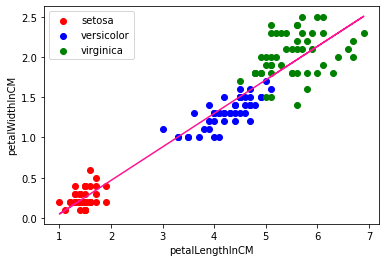


F =  1012.3289064423959
score =  0.9269012279220037
valor crítico =  0.6964712345492198


In [ ]:
# Slide 27
iris("petalLengthInCM","petalWidthInCM")

Theta 0 encontrado: 3.388637
Theta 1 encontrado: -0.057268
Equação da Reta: Y = [3.38863738]  +  [[-0.05726823]] * X



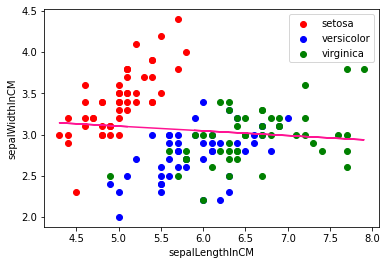


F =  74.8958769812881
score =  0.0119616328347677
valor crítico =  0.6964712345492198


In [ ]:
# Slide 28
iris("sepalLengthInCM","sepalWidthInCM")

Theta 0 encontrado: -7.095381
Theta 1 encontrado: 1.857510
Equação da Reta: Y = [-7.09538148]  +  [[1.85750967]] * X



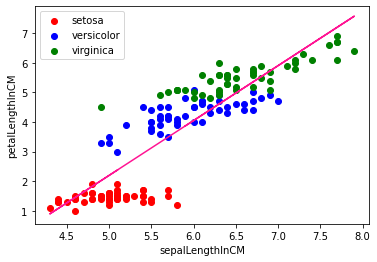


F =  308.2759307858017
score =  0.7599553107783261
valor crítico =  0.6964712345492198


In [ ]:
# Slide 29
iris("sepalLengthInCM","petalLengthInCM")

Theta 0 encontrado: -3.206277
Theta 1 encontrado: 0.753841
Equação da Reta: Y = [-3.2062769]  +  [[0.75384088]] * X



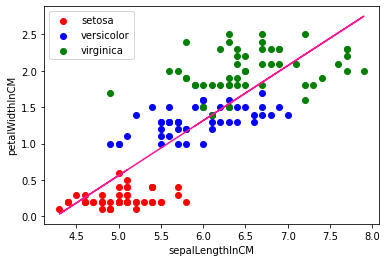


F =  223.5974785517568
score =  0.6690481463418159
valor crítico =  0.6964712345492198


In [ ]:
# Slide 30
iris("sepalLengthInCM","petalWidthInCM")

Theta 0 encontrado: 8.984676
Theta 1 encontrado: -1.711201
Equação da Reta: Y = [8.98467571]  +  [[-1.71120139]] * X



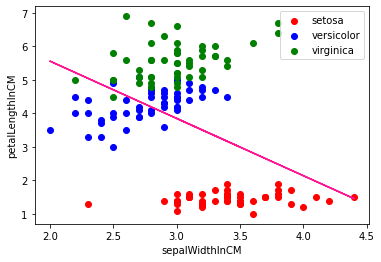


F =  89.89678981137622
score =  0.17683378733246502
valor crítico =  0.6964712345492198


In [ ]:
# Slide 31
iris("sepalWidthInCM","petalLengthInCM")

Theta 0 encontrado: 3.115193
Theta 1 encontrado: -0.627546
Equação da Reta: Y = [3.11519269]  +  [[-0.62754618]] * X



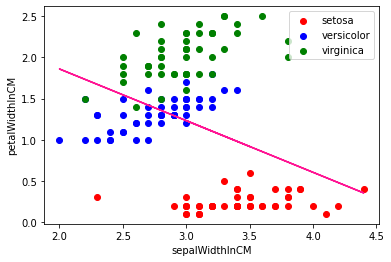


F =  84.77718889719586
score =  0.12712368783853756
valor crítico =  0.6964712345492198


In [ ]:
# Slide 32
iris("sepalWidthInCM","petalWidthInCM")

Os gráficos e os scores são iguais aos dos slides

## 3) Questão 

Selecione aleatoriamente uma amostra contendo 10 exemplos do dataset.
Faca um programa que gere um modelo de regressao Ridge a partir destes pontos,
considerando o par de atributos sepalLengthInCM x petalLengthInCM. Seu
programa deve gerar um grafico com todos os pontos do dataset (com cores
difirentes para as instancias usadas na regressao Ridge e as demais), a reta obtida
pela regressao linear e a reta obtida pela regressao Ridge. Use
λ ∈ {1, 5, 10, 50, 100}.

In [ ]:
# Pega uma amostra contendo 10 exemplos aleatorios do dataset
random = iris_data.sample(10)
random 

,sepalLengthInCM,sepalWidthInCM,petalLengthInCM,petalWidthInCM,class
146,6.3,2.5,5.0,1.9,Iris-virginica
138,6.0,3.0,4.8,1.8,Iris-virginica
127,6.1,3.0,4.9,1.8,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica
12,4.8,3.0,1.4,0.1,Iris-setosa
64,5.6,2.9,3.6,1.3,Iris-versicolor
90,5.5,2.6,4.4,1.2,Iris-versicolor
27,5.2,3.5,1.5,0.2,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
77,6.7,3.0,5.0,1.7,Iris-versicolor


In [ ]:
  input_cols = ['sepalLengthInCM']
  output_variable = ['petalLengthInCM']
  # Separar x e y do conjunto com 10 pontos para a Regressão de Ridge
  X3 = random[input_cols] 
  Y3 = random[output_variable]
  # Separar x e y do dataset com todos os pontos
  Y4 = iris_data[output_variable]
  X4 = iris_data[input_cols]
  # Separar x e y do conjunto com 10 pontos para a Regressão de Linear
  X5 = random[input_cols]
  Y5 = random[output_variable]
  # Modelo linear
  linreg = LinearRegression()
  linreg.fit(X5,Y5)
  theta0 = linreg.intercept_
  theta1 = linreg.coef_
  Y5_previsto = theta0+theta1*X4
  scores=[] # Armazenar os scores das Regressões de Ridge

In [ ]:
def grafico(i):
  ridge = Ridge (alpha=i)
  ridge.fit(X3,Y3)
  Y4_previsto = ridge.predict(X4)
  teta0 = ridge.intercept_
  teta1 = ridge.coef_
  score=ridge.score(X3,Y3)
  scores.append(score)
  print('Equação da Ridge: Y =', teta0,' + ',teta1,'* X' )
  print('Equação da Regressão Linear: Y =', theta0,' + ',theta1,'* X' )
  print()
  plt.plot(X4, Y4_previsto,  color='#FF1493') 
  plt.plot(X4, Y5_previsto,  color='blue') 
  plt.legend(["Ridge: 10 pontos","Linear: 10 pontos"])
  plt.scatter(X4, Y4,marker='o',color='gray')
  plt.scatter(X3, Y3,marker='o',color='red') 


Equação da Ridge: Y = [-7.11701645]  +  [[1.8979013]] * X
Equação da Regressão Linear: Y = [-9.64371648]  +  [[2.34040569]] * X



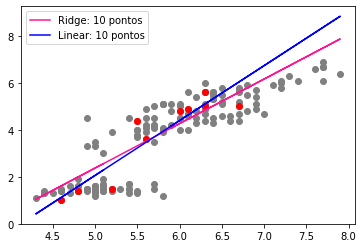

In [ ]:
grafico(1.0)

Equação da Ridge: Y = [-2.45041447]  +  [[1.08063301]] * X
Equação da Regressão Linear: Y = [-9.64371648]  +  [[2.34040569]] * X



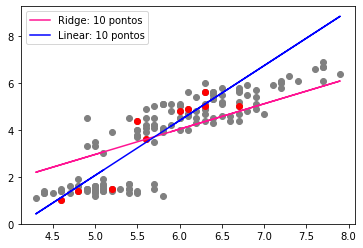

In [ ]:
grafico(5.0)

Equação da Ridge: Y = [-0.29126601]  +  [[0.70249843]] * X
Equação da Regressão Linear: Y = [-9.64371648]  +  [[2.34040569]] * X



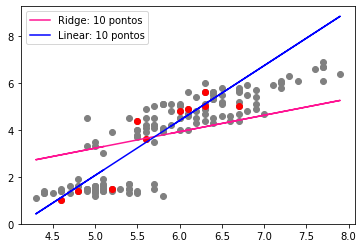

In [ ]:
grafico(10.0)

Equação da Ridge: Y = [2.6642248]  +  [[0.18489934]] * X
Equação da Regressão Linear: Y = [-9.64371648]  +  [[2.34040569]] * X



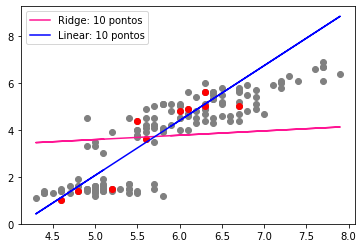

In [ ]:
grafico(50.0)

Equação da Ridge: Y = [3.17040244]  +  [[0.09625176]] * X
Equação da Regressão Linear: Y = [-9.64371648]  +  [[2.34040569]] * X



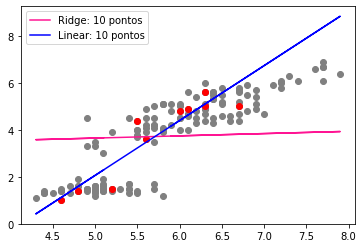

In [ ]:
grafico(100.0)

À medida que λ aumenta para infinito, o impacto da penalidade de contração aumenta, e os coeficientes da regressão se aproximam de zero.

Text(0, 0.5, 'Score')

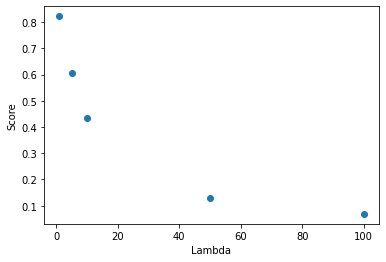

In [ ]:
plt.scatter([1,5,10,50,100],scores)
plt.xlabel('Lambda')
plt.ylabel('Score')